<a href="https://colab.research.google.com/github/pavankonam/Cognizant/blob/main/AWSassignement1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AWS Assignment created by Pavan Kartheek 

### Installing the libraries required

In [ ]:
!pip install nltk
!pip3 install -U spacy==3.3.0
!python3 -m spacy download en_core_web_lg

     |████████████████████████████████| 400.7 MB 1.6 kB/s             
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


### Loading the Libraries required

In [ ]:
import boto3
import pandas as pd
import io
import numpy as np
import spacy
import matplotlib.pyplot as plt
from sagemaker import get_execution_role

## 1. Reading all the files from the S3 bucket

In [ ]:
role = get_execution_role()
bucket = 'pavanawsnlp'
s= boto3.client('s3')
data =[]
for i in range(1,5):
    contents = s.get_object(Bucket=bucket, Key=str(i)+'.txt')
    for f in contents['Body']:
        data.append(f)

## 2. Combining the text from all the files

In [ ]:
da=''
for i in data:
    da+=str(i)
print(da)

b'In 1928, the All Parties Conference convened a committee in Lucknow to prepare the Constitution of India, which was known as the Nehru Report.\r\nMost of the colonial India was under British rule from 1857 to 1947. From 1947 to 1950, the same legislation continued to be implemented as India was a dominion of Britain for these three years, as each princely state was convinced by Sardar Patel and V.P.Menon to sign the articles of integration with India, and the British government continued to be responsible for the external security of the country. Thus, the constitution of India repealed the Indian Independence Act 1947 and Government of India Act 1935 when it became effective on 26 January 1950. India ceased to be a dominion of the British Crown and became a sovereign democratic republic with the constitution. Articles 5, 6, 7, 8, 9, 60, 324, 366, 367, 379, 380, 388, 391, 392, 393, and 394 of the constitution came into force on 26 November 1949, and the remaining articles became effe

## 3. Sentence Segmentation

In [ ]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(da)
se = []
for i in doc.sents:
    se.append(str(i))
se

["b'In 1928, the All Parties Conference convened a committee in Lucknow to prepare the Constitution of India, which was known as the Nehru Report.\\r\\nMost of the colonial India was under British rule from 1857 to 1947.",
 'From 1947 to 1950, the same legislation continued to be implemented as India was a dominion of Britain for these three years, as each princely state was convinced by Sardar Patel and V.P.Menon to sign the articles of integration with India, and the British government continued to be responsible for the external security of the country.',
 'Thus, the constitution of India repealed the Indian Independence Act 1947 and Government of India Act 1935 when it became effective on 26 January 1950.',
 'India ceased to be a dominion of the British Crown and became a sovereign democratic republic with the constitution.',
 'Articles 5, 6, 7, 8, 9, 60, 324, 366, 367, 379, 380, 388, 391, 392, 393, and 394 of the constitution came into force on 26 November 1949, and the remaining 

## 4. Word Segmentation

In [ ]:
word = []
for i in se:
    w = nlp(i)
    for j in w:
        word.append(j.text)
word

["b'In",
 '1928',
 ',',
 'the',
 'All',
 'Parties',
 'Conference',
 'convened',
 'a',
 'committee',
 'in',
 'Lucknow',
 'to',
 'prepare',
 'the',
 'Constitution',
 'of',
 'India',
 ',',
 'which',
 'was',
 'known',
 'as',
 'the',
 'Nehru',
 'Report.\\r\\nMost',
 'of',
 'the',
 'colonial',
 'India',
 'was',
 'under',
 'British',
 'rule',
 'from',
 '1857',
 'to',
 '1947',
 '.',
 'From',
 '1947',
 'to',
 '1950',
 ',',
 'the',
 'same',
 'legislation',
 'continued',
 'to',
 'be',
 'implemented',
 'as',
 'India',
 'was',
 'a',
 'dominion',
 'of',
 'Britain',
 'for',
 'these',
 'three',
 'years',
 ',',
 'as',
 'each',
 'princely',
 'state',
 'was',
 'convinced',
 'by',
 'Sardar',
 'Patel',
 'and',
 'V.P.Menon',
 'to',
 'sign',
 'the',
 'articles',
 'of',
 'integration',
 'with',
 'India',
 ',',
 'and',
 'the',
 'British',
 'government',
 'continued',
 'to',
 'be',
 'responsible',
 'for',
 'the',
 'external',
 'security',
 'of',
 'the',
 'country',
 '.',
 'Thus',
 ',',
 'the',
 'constitution',


## 5. Removing Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
sw = [wo for wo in word if not wo in stopwords.words('english')]
sw

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


["b'In",
 '1928',
 ',',
 'All',
 'Parties',
 'Conference',
 'convened',
 'committee',
 'Lucknow',
 'prepare',
 'Constitution',
 'India',
 ',',
 'known',
 'Nehru',
 'Report.\\r\\nMost',
 'colonial',
 'India',
 'British',
 'rule',
 '1857',
 '1947',
 '.',
 'From',
 '1947',
 '1950',
 ',',
 'legislation',
 'continued',
 'implemented',
 'India',
 'dominion',
 'Britain',
 'three',
 'years',
 ',',
 'princely',
 'state',
 'convinced',
 'Sardar',
 'Patel',
 'V.P.Menon',
 'sign',
 'articles',
 'integration',
 'India',
 ',',
 'British',
 'government',
 'continued',
 'responsible',
 'external',
 'security',
 'country',
 '.',
 'Thus',
 ',',
 'constitution',
 'India',
 'repealed',
 'Indian',
 'Independence',
 'Act',
 '1947',
 'Government',
 'India',
 'Act',
 '1935',
 'became',
 'effective',
 '26',
 'January',
 '1950',
 '.',
 'India',
 'ceased',
 'dominion',
 'British',
 'Crown',
 'became',
 'sovereign',
 'democratic',
 'republic',
 'constitution',
 '.',
 'Articles',
 '5',
 ',',
 '6',
 ',',
 '7',
 ','

## 6. Stemming of the words

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ste=[] 
ps = PorterStemmer()
for i in sw:
    ste.append(ps.stem(i))
ste

["b'in",
 '1928',
 ',',
 'all',
 'parti',
 'confer',
 'conven',
 'committe',
 'lucknow',
 'prepar',
 'constitut',
 'india',
 ',',
 'known',
 'nehru',
 'report.\\r\\nmost',
 'coloni',
 'india',
 'british',
 'rule',
 '1857',
 '1947',
 '.',
 'from',
 '1947',
 '1950',
 ',',
 'legisl',
 'continu',
 'implement',
 'india',
 'dominion',
 'britain',
 'three',
 'year',
 ',',
 'princ',
 'state',
 'convinc',
 'sardar',
 'patel',
 'v.p.menon',
 'sign',
 'articl',
 'integr',
 'india',
 ',',
 'british',
 'govern',
 'continu',
 'respons',
 'extern',
 'secur',
 'countri',
 '.',
 'thu',
 ',',
 'constitut',
 'india',
 'repeal',
 'indian',
 'independ',
 'act',
 '1947',
 'govern',
 'india',
 'act',
 '1935',
 'becam',
 'effect',
 '26',
 'januari',
 '1950',
 '.',
 'india',
 'ceas',
 'dominion',
 'british',
 'crown',
 'becam',
 'sovereign',
 'democrat',
 'republ',
 'constitut',
 '.',
 'articl',
 '5',
 ',',
 '6',
 ',',
 '7',
 ',',
 '8',
 ',',
 '9',
 ',',
 '60',
 ',',
 '324',
 ',',
 '366',
 ',',
 '367',
 ',',
 

## 7. Storing the results in s3 bucket in a new folder called 'results' inside it

In [ ]:
result = (" ".join(ste))
f = open("results.txt", "a")
f.write(result)
folder = "results"
s.put_object(Bucket= bucket, Key= (folder+'/'))
s.upload_file('results.txt',bucket,'results/results.txt')

## 8. Reading the same results folder to read 

In [ ]:
rs =[]
cs = s.get_object(Bucket=bucket, Key='results/results.txt')
for f in cs['Body']:
    rs.append(f.decode(encoding='utf-8'))
words= str(rs).split()
words

["['b\\'in",
 '1928',
 ',',
 'all',
 'parti',
 'confer',
 'conven',
 'committe',
 'lucknow',
 'prepar',
 'constitut',
 'india',
 ',',
 'known',
 'nehru',
 'report.\\\\r\\\\nmost',
 'coloni',
 'india',
 'british',
 'rule',
 '1857',
 '1947',
 '.',
 'from',
 '1947',
 '1950',
 ',',
 'legisl',
 'continu',
 'implement',
 'india',
 'dominion',
 'britain',
 'three',
 'year',
 ',',
 'princ',
 'state',
 'convinc',
 'sardar',
 'patel',
 'v.p.menon',
 'sign',
 'articl',
 'integr',
 'india',
 ',',
 'british',
 'govern',
 'continu',
 'respons',
 'extern',
 'secur',
 'countri',
 '.',
 'thu',
 ',',
 'constitut',
 'india',
 'repeal',
 'indian',
 'independ',
 'act',
 '1947',
 'govern',
 'india',
 'act',
 '1935',
 'becam',
 'effect',
 '26',
 'januari',
 '1950',
 '.',
 'india',
 'ceas',
 'dominion',
 'british',
 'crown',
 'becam',
 'sovereign',
 'democrat',
 'republ',
 'constitut',
 '.',
 'articl',
 '5',
 ',',
 '6',
 ',',
 '7',
 ',',
 '8',
 ',',
 '9',
 ',',
 '60',
 ',',
 '324',
 ',',
 '366',
 ',',
 '367',

## 9. Label Encoding on all the words

In [ ]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
encode = label.fit_transform(words)
encode

[215  81  24 ... 709 736 217]


## 10. K-Means Clustering on Label Encoded Words

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
x = encode.reshape(-1,1)
kmeans = KMeans(n_clusters=5, random_state = 200).fit(x)
y = kmeans.predict(x)
print(y)

[0 0 0 ... 4 4 0]


In [ ]:
print(kmeans.cluster_centers_)

[[  62.97067745]
 [1004.06706408]
 [ 379.98008535]
 [1302.546875  ]
 [ 701.43852459]]


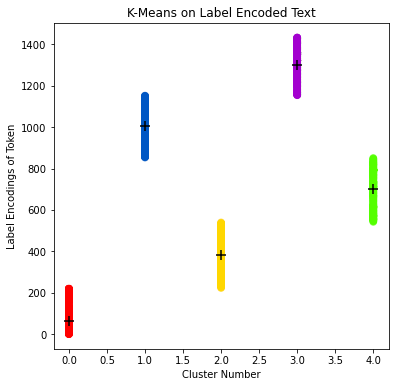

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y, [i for i in data], c=y, cmap='prism', marker='.', s=180, alpha=0.2)
plt.scatter([0,1,2,3,4], kmeans.cluster_centers_,  color='black', marker='+', s=100)
plt.xlabel('Cluster Number')
plt.ylabel('Label Encodings of Token')
plt.title('K-Means on Label Encoded Text')
plt.show()